## THE BEHAVIOR OF THE FEAR NETWORK COULD BE AFFECTED BY THE INTENSITY OF THE STIMULUS AND THE INTEGRITY OF THE NETWORK

In [1]:
from netpyne import specs, sim
import numpy as np

Create type A, B and C neurons and interneurons with proportion (80:20) between neurons and interneurons and each neuron type with proportion (50:30:20) only to print the spikes and raster

In [2]:
tstop = 1000.0

arq = './KimEtAl2013/LAcells_template.hoc'
arq2 = './KimEtAl2013/interneuron_template.hoc'

# Network parameters
netParams = specs.NetParams() # object of class NetParams to store the network parameters
netParams.sizeX = 200 # x-dimension (horizontal length) size in um
netParams.sizeY = 1000 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 200 # z-dimension (horizontal length) size in um
#netParams.propVelocity = 100.0 # propagation velocity (um/ms)
netParams.shape = 'cylindrer'
#netParams.probLengthConst = 150.0 # length constant for conn probability (um)

## Import cell template

In [3]:
## Population parameter

n_neurons = 100 #total number of neurons
netParams.popParams['LAddA'] = {'cellType': 'A', 'numCells': int((n_neurons*0.8)*0.5/2), 
                                    'cellModel': 'HH', 'yRange': [0.5,1]}
netParams.popParams['LAddB'] = {'cellType': 'B', 'numCells': int((n_neurons*0.8)*0.3/2), 
                                    'cellModel': 'HH', 'yRange': [0.5,1]}
netParams.popParams['LAddC'] = {'cellType': 'C', 'numCells': int((n_neurons*0.8)*0.2/2),
                                    'cellModel': 'HH', 'yRange': [0.5,1]}

netParams.popParams['LAdvA'] = {'cellType': 'A', 'numCells': int((n_neurons*0.8)*0.5/2), 
                                    'cellModel': 'HH', 'yRange': [0,0.5]}
netParams.popParams['LAdvB'] = {'cellType': 'B', 'numCells': int((n_neurons*0.8)*0.3/2), 
                                    'cellModel': 'HH', 'yRange': [0,0.5]}
netParams.popParams['LAdvC'] = {'cellType': 'C', 'numCells': int((n_neurons*0.8)*0.2/2), 
                                    'cellModel': 'HH', 'yRange': [0,0.5]}

netParams.popParams['IN'] = {'cellType': 'Interneuron', 'numCells': int(n_neurons*0.2), 
                                 'cellModel': 'HH', 'yRange': [0,1]}

#### Import amygdala cells A, B, C and interneurons of the model of Kim at al. (2013) and their synaptic mechanisms

In [4]:
### Import A
netParams.importCellParams(label='LAddA_rule', conds={'cellType': 'A', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_A', importSynMechs=True)
### Import B
netParams.importCellParams(label='LAddB_rule', conds={'cellType': 'B', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_B', importSynMechs=True)
## Import C
netParams.importCellParams(label='LAddC_rule', conds={'cellType': 'C', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_C', importSynMechs=True)

### Import A
netParams.importCellParams(label='LAdvA_rule', conds={'cellType': 'A', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_A', importSynMechs=True)
### Import B
netParams.importCellParams(label='LAdvB_rule', conds={'cellType': 'B', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_B', importSynMechs=True)
## Import C
netParams.importCellParams(label='LAdvC_rule', conds={'cellType': 'C', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_C', importSynMechs=True)


## Import interneurons
netParams.importCellParams(label='IN_rule', conds={'cellType': 'Interneuron', 'cellModel': 'HH'}, 
                           fileName=arq2, cellName='InterneuronCell', importSynMechs=True)

{conds: {cellType: 'Interneuron', cellModel: 'HH'}, secs: {soma: {geom: {L: 15.0, nseg: 1, diam: 15.0, Ra: 3375.0, cm: 1.0}, topol: {}, mechs: {kdrinter: {gkdrbar: 0.008}, leakinter: {glbar_inter: 5e-05, el: -70.0}, nainter: {gnabar: 0.035}}, ions: {k: {e: -80.0, i: 54.4, o: 2.5}, na: {e: 45.0, i: 10.0, o: 140.0}}}, dend: {geom: {L: 150.0, nseg: 1, diam: 10.0, Ra: 150.0, cm: 1.0}, topol: {parentSec: 'soma', parentX: 1.0, childX: 0.0}, mechs: {kdrinter: {gkdrbar: 0.003}, leakinter: {glbar_inter: 5e-05, el: -70.0}, nainter: {gnabar: 0.01}}, ions: {ca: {e: 120.0, i: 5e-05, o: 2.0}, k: {e: -80.0, i: 54.4, o: 2.5}, na: {e: 45.0, i: 10.0, o: 140.0}}}}, secLists: {}, globals: {}, _repr_mimebundle_: {}}

## Create synaptic mechanisms

In [5]:
## Synaptic mechanism
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 0.25, 'tau2': 7.0, 'e': 0}  # AMPA synaptic mechanism
netParams.synMechParams['NMDA'] = {'mod': 'Exp2Syn', 'tau1': 3.65, 'tau2': 125.0, 'e': 0}  # AMPA synaptic mechanism
netParams.synMechParams['GABA'] = {'mod': 'Exp2Syn', 'tau1': 0.13, 'tau2': 3.75, 'e': -75}  # GABA synaptic mechanism

##  Define stimuli

In [6]:
## Synaptic weights
w_e = 0.2e-2       #excitatory synaptic strength (KimEtAl2013: gAMPA=1nS; gNMDA=0.5nS; gGABA=0.6nS)
w_i = -w_e*0.6    #inhibitory synaptic strength

w_bkg = w_e     #excitatory synaptic weight from bkg->populations

w_pp = w_e
w_ip = w_i
w_pi = w_e
w_ii = w_i

### Define parameters of stimulation and connection with the background

In [7]:
## Stimulation
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 70, 'noise': 1}

netParams.stimTargetParams['bkg->LAddA'] = {'source': 'bkg', 'conds': {'pop': 'LAddA'}, 'weight': w_bkg, 'sec': 'soma'}
netParams.stimTargetParams['bkg->LAddB'] = {'source': 'bkg', 'conds': {'pop': 'LAddB'},'weight': w_bkg, 'sec': 'soma'}
netParams.stimTargetParams['bkg->LAddC'] = {'source': 'bkg', 'conds': {'pop': 'LAddC'}, 'weight': w_bkg, 'sec': 'soma'}
netParams.stimTargetParams['bkg->LAdvA'] = {'source': 'bkg', 'conds': {'pop': 'LAdvA'}, 'weight': w_bkg, 'sec': 'soma'}
netParams.stimTargetParams['bkg->LAdvB'] = {'source': 'bkg', 'conds': {'pop': 'LAdvB'},'weight': w_bkg, 'sec': 'soma'}
netParams.stimTargetParams['bkg->LAdvC'] = {'source': 'bkg', 'conds': {'pop': 'LAdvC'}, 'weight': w_bkg, 'sec': 'soma'}

netParams.stimTargetParams['bkg->Interneuron'] = {'source': 'bkg', 'conds': {'pop': 'IN'},'weight': w_bkg,'sec': 'soma'}

### Definition of the stimuli: Shock and Tone. 
It will only be applied in the dorsal part of the LA and in the interneurons

In [8]:
## Pulses
tp_start = np.arange(50,tstop,200)
tp_end = tp_start + 50
p_rate = 300.0 # in Hz
pulses=[]
for i in range(len(tp_start)):
	pulses.append({'start':tp_start[i], 'end':tp_end[i], 'rate':p_rate, 'noise':1.0})

# create custom list of spike times
spkTimes = [0.0]
netParams.popParams['pulse'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes, 'pulses': pulses}  # VecStim with spike times

## Connect pulses ->
netParams.connParams['pulse->S'] = { 	#  pulse -> S label
 	'preConds': {'pop': 'pulse'}, 	# conditions of presyn cells
 	'postConds': {'pop': ['LAddA', 'LAddB', 'LAddC', 'IN']}, # conditions of postsyn cells
 	'weight': w_pp, 				# synaptic weight
 	'delay': 1.0,						# transmission delay (ms)
 	'synMech': 'AMPA'}   			# synaptic mechanism

## Defining the connections between cells

### Defining the weights and plasticity

In [9]:
sec = 'dend'
#plast = {'mech': 'STDP', 'params': {'hebbwt': 0.01, 'antiwt':-0.01, 'wmax': 50, 'RLon': 1, 'tauhebb': 10}}
plast = ''

### Connection between dorsal population

In [10]:

netParams.connParams['LAddA->all_d'] = {'preConds': {'pop': 'LAddA'}, 'postConds': {'pop': ['LAddB','LAddC']}, 
                    'probability': 0.2,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

netParams.connParams['LAddB->all_d'] = {'preConds': {'pop': 'LAddB'}, 'postConds': {'pop': ['LAddA','LAddC']}, 
                    'probability': 0.2,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec,'synMech': 'AMPA',
                    'plasticity': plast}

netParams.connParams['LAddC->all_d'] = {'preConds': {'pop': 'LAddC'}, 'postConds': {'pop': ['LAddB','LAddA']}, 
                    'probability': 0.2,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec,'synMech': 'AMPA',
                    'plasticity': plast}

### Connections between ventral population

In [11]:
netParams.connParams['LAdvA->all_v'] = {'preConds': {'pop': 'LAdvA'}, 'postConds': {'pop': ['LAdvB','LAdvC']}, 
                    'probability': 0.2,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

netParams.connParams['LAdvB->all_v'] = {'preConds': {'pop': 'LAdvB'}, 'postConds': {'pop': ['LAdvA','LAdvC']}, 
                    'probability': 0.2,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

netParams.connParams['LAdvC->all_v'] = {'preConds': {'pop': 'LAdvC'}, 'postConds': {'pop': ['LAdvB','LAdvA']}, 
                    'probability': 0.2,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

### Connect to the interneurons

In [12]:
netParams.connParams['Interneuron->all'] = {'preConds': {'pop': 'IN'}, 'postConds': 
                                            {'pop': ['LAddA','LAddB','LAddC','LAdvA','LAdvB','LAdvC']}, 
                    'probability': 0.2,  # max number of incoming conns to cell	'
                    'weight': w_ip,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'GABA',
                    'plasticity': plast}

netParams.connParams['all->Interneuron'] = {'preConds': {'pop': ['LAddA','LAddB','LAddC','LAdvA','LAdvB','LAdvC']},
                                            'postConds': {'pop': 'IN'}, 
                    'probability': 0.2,  # max number of incoming conns to cell	'
                    'weight':  w_pi,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

netParams.connParams['Interneuron->Interneuron'] = {'preConds': {'pop': 'IN'}, 'postConds': 
                                            {'pop': ['IN']}, 
                    'probability': 0.2,  # max number of incoming conns to cell	'
                    'weight': w_ii,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'GABA',
                    'plasticity': plast}

### Connection between dorsal and ventral regions of the amygdala. 
It was created separately because there are less connections between regions than inside a region

In [13]:
p_r = 0.1
netParams.connParams['LAddA->all_v'] = {'preConds': {'pop': 'LAddA'}, 'postConds': {'pop': ['LAdvB','LAdvC']}, 
                    'probability': p_r,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

netParams.connParams['LAddB->all_v'] = {'preConds': {'pop': 'LAddB'}, 'postConds': {'pop': ['LAdvA','LAdvC']}, 
                    'probability': p_r,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

netParams.connParams['LAddC->all_v'] = {'preConds': {'pop': 'LAddC'}, 'postConds': {'pop': ['LAdvB','LAdvA']}, 
                    'probability': p_r,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}


netParams.connParams['LAdvA->all_d'] = {'preConds': {'pop': 'LAdvA'}, 'postConds': {'pop': ['LAddB','LAddC']}, 
                    'probability': p_r,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

netParams.connParams['LAdvB->all_d'] = {'preConds': {'pop': 'LAdvB'}, 'postConds': {'pop': ['LAddA','LAddC']}, 
                    'probability': p_r,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

netParams.connParams['LAdvC->all_d'] = {'preConds': {'pop': 'LAdvC'}, 'postConds': {'pop': ['LAddB','LAddA']}, 
                    'probability': p_r,  # max number of incoming conns to cell	'
                    'weight': w_pp,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': sec, 'synMech': 'AMPA',
                    'plasticity': plast}

## Simulation options

In [14]:
simConfig = specs.SimConfig() # object of class SimConfig to store simulation configuration
simConfig.duration = tstop#1*1e3 # Duration of the simulation, in ms
simConfig.dt = 0.025  # Internal integration timestep to use
simConfig.verbose = 0
simConfig.hParams = {'celsius':31}

In [15]:
# Show detailed messages
#simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}
# Dict with traces to record
simConfig.recordStep = 0.1
# Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output'
# Set file output names
simConfig.saveJson = True

#### Plot the spikes and the raster plot

In [16]:
# Save params, network and sim output to pickle file
# simConfig.analysis['plotRaster'] = {'orderInverse': True, 'saveFig': 'raster_piramidal.png', 
#                                     'include': list(range(0, 80))}
# simConfig.analysis['plotRaster'] = {'orderInverse': True, 
# #                                      'include': list(range(81, 101))}

simConfig.analysis['plotRaster'] = {'orderInverse': True,}
# Plot a raster
#simConfig.analysis['plotTraces'] = {'include': [0,10,13,15]}
simConfig.analysis['plot2Dnet'] = True 
simConfig.analysis['plotConn'] = True


Creating network of 8 cell populations on 1 hosts...
  Number of cells on node 0: 101 
  Done; cell creation time = 0.26 s.
Making connections...
  Number of connections on node 0: 1346 
  Done; cell connection time = 0.30 s.
Adding stims...
  Number of stims on node 0: 100 
  Done; cell stims creation time = 0.05 s.

Running simulation for 1000.0 ms...
  Done; run time = 41.68 s; real-time ratio: 0.02.

Gathering data...
  Done; gather time = 0.26 s.

Analyzing...
  Cells: 101
  Connections: 1446 (14.32 per cell)
  Spikes: 1195 (11.83 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 41.68 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 0.34 s.
Plotting raster...


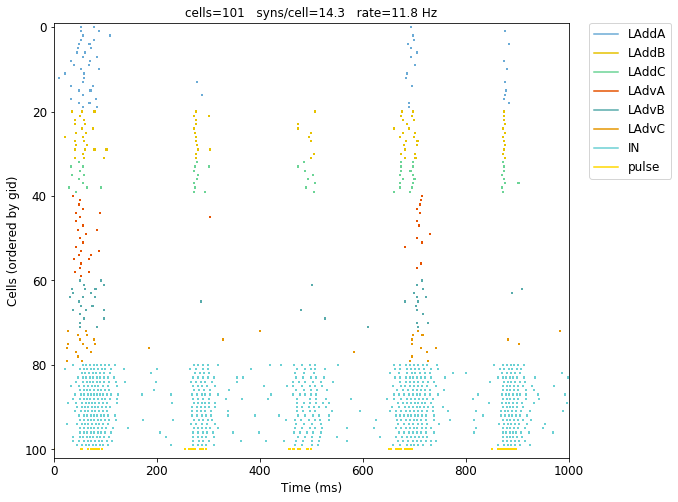

Plotting 2D representation of network cell locations and connections...


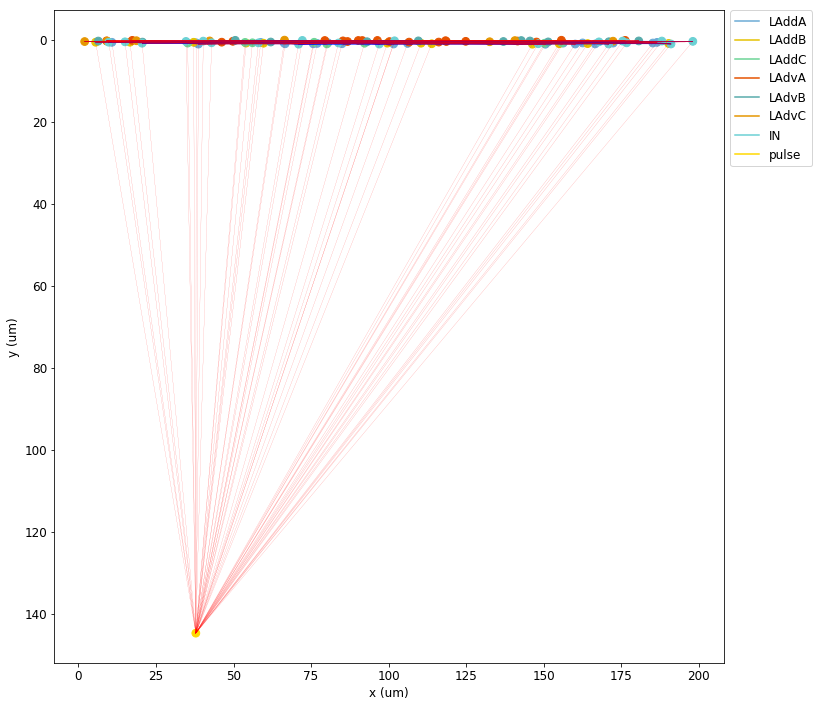

Plotting connectivity matrix...


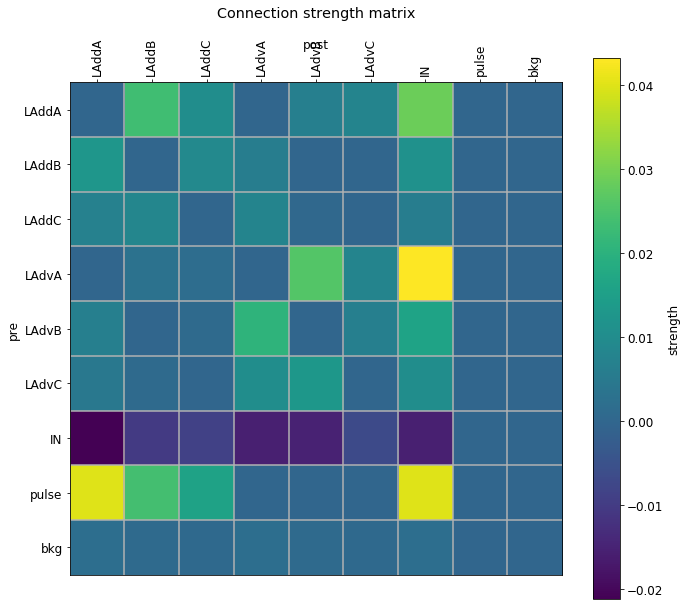

  Done; plotting time = 8.23 s

Total time = 51.12 s


In [17]:
# Plot recorded traces for this list of cells
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

Plotting spike histogram...


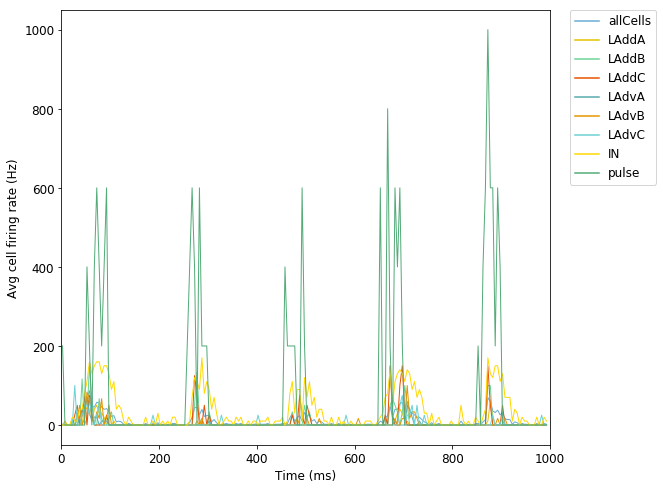

(<Figure size 720x576 with 1 Axes>,
 {'include': ['allCells',
   'LAddA',
   'LAddB',
   'LAddC',
   'LAdvA',
   'LAdvB',
   'LAdvC',
   'IN',
   'pulse'],
  'histoData': [array([ 1.98019802,  1.98019802,  0.        ,  0.        ,  7.92079208,
          11.88118812, 15.84158416, 19.8019802 , 33.66336634, 43.56435644,
          63.36633663, 87.12871287, 47.52475248, 45.54455446, 57.42574257,
          55.44554455, 45.54455446, 39.6039604 , 41.58415842, 33.66336634,
          21.78217822, 23.76237624,  7.92079208,  9.9009901 ,  7.92079208,
           1.98019802,  0.        ,  3.96039604,  1.98019802,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  3.96039604,
           0.        ,  0.        ,  3.96039604,  0.        ,  5.94059406,
           0.        ,  1.98019802,  0.        ,  1.98019802,  0.        ,
           3.96039604,  3.96039604,  0.        ,  0.        ,  0.        ,
           0.        ,  1.98019802,  5.94059406, 19.8019802 , 43.56435644,
      

In [18]:
sim.analysis.plotSpikeHist (include = ['allCells', 'eachPop'])

Plotting 3D cell shape ...


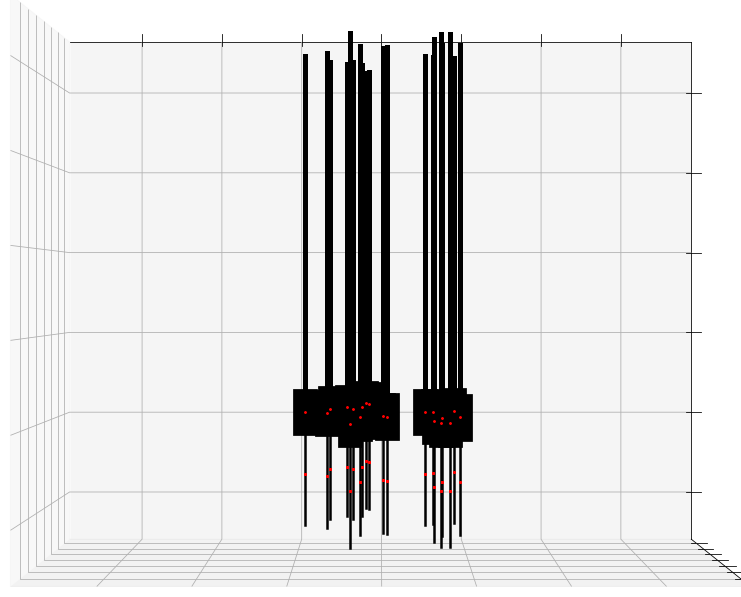

(<Figure size 720x576 with 1 Axes>, {})

In [19]:
#sim.analysis.plotShape(include = ['allCells', 'eachPop'])
sim.analysis.plotShape(includePre=['IN'],includePost=['LAddA'], showSyns=1)

Plotting spike stats...


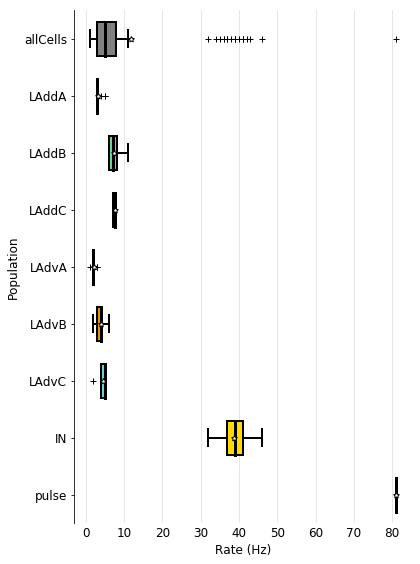

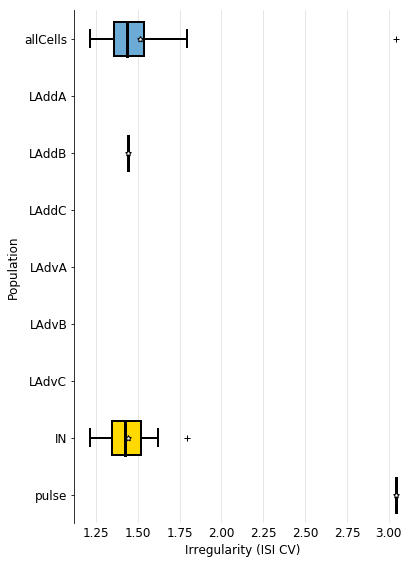

(<Figure size 432x576 with 1 Axes>,
 {'include': ['allCells',
   'LAddA',
   'LAddB',
   'LAddC',
   'LAdvA',
   'LAdvB',
   'LAdvC',
   'IN',
   'pulse'],
  'statData': [[1.4416213298359188,
    1.4470367926452536,
    1.3309803661206858,
    1.3646188973771947,
    1.5120585174718528,
    1.3239917551090499,
    1.4925902939522382,
    1.419164942238346,
    1.3528294017630211,
    1.2125395203912392,
    1.5418879739461633,
    1.791787350219249,
    1.3979596760241548,
    1.4808368815029254,
    1.2764697598509829,
    1.6211117114273925,
    1.3819467999624662,
    1.2794886697528904,
    1.5566857644022398,
    1.4271683431345574,
    1.5862474175104888,
    3.043252004584595],
   [],
   [1.4416213298359188],
   [],
   [],
   [],
   [],
   [1.4470367926452536,
    1.3309803661206858,
    1.3646188973771947,
    1.5120585174718528,
    1.3239917551090499,
    1.4925902939522382,
    1.419164942238346,
    1.3528294017630211,
    1.2125395203912392,
    1.5418879739461633,
    1.7

In [20]:
sim.analysis.plotSpikeStats(include = ['allCells', 'eachPop'])